<class 'pandas.DataFrame'>
RangeIndex: 38228 entries, 0 to 38227
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   core_project_number    38228 non-null  str  
 1   clinicaltrials.gov_id  38228 non-null  str  
 2   study                  38228 non-null  str  
 3   study_status           38228 non-null  str  
dtypes: str(4)
memory usage: 1.2 MB
Total studies: 38228
Completion Rate: 61.84%


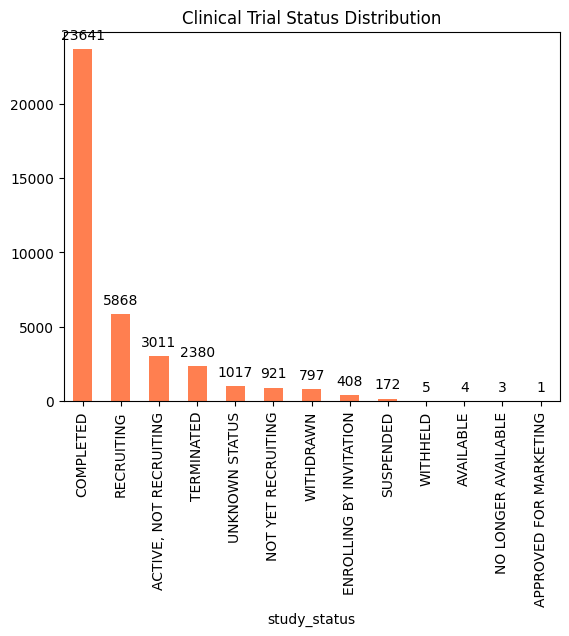

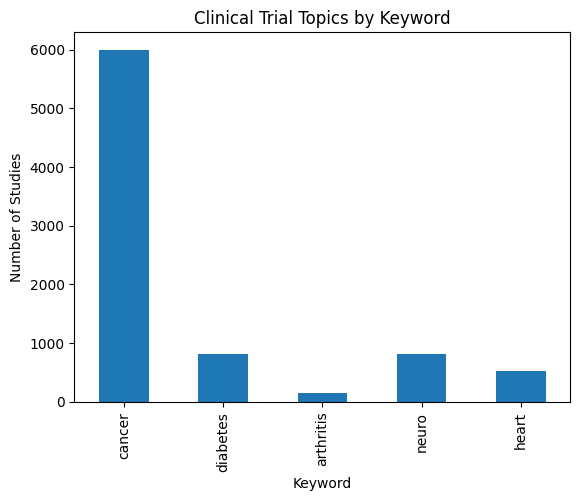

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv("../RawData/clinicalStudies.csv")
df.head()

#Clean data and validate
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.drop_duplicates(inplace=True)
df.info()

#Basic metrics
print("Total studies:", len(df))
df['study_status'].value_counts()

#Completion rate
completion_rate = (df['study_status'] == 'COMPLETED').mean() * 100
print(f"Completion Rate: {completion_rate:.2f}%")

# status distribution chart
plt.title("Clinical Trial Status Distribution")
status_counts = df['study_status'].value_counts()
ax=status_counts.plot(kind='bar',color = 'coral')
#----------------Adding label
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext =(0,5),
        textcoords ="offset points",
        ha='center',
        va='bottom'
    )
plt.savefig("../Reports/StatusCount.png",bbox_inches='tight')
plt.show()

#df['study_status'].value_counts().plot(kind='bar')
#plt.title("Clinical Trial Status Distribution")
#plt.show()



#keyword topic analysis
keywords = ['cancer','diabetes','arthritis','neuro','heart']
results = []

for k in keywords:
    count = df['study'].str.contains(k, case=False, na=False).sum()
    results.append((k, count))

topic_df = pd.DataFrame(results, columns=['Keyword', 'Count'])

#visualization
topic_df.plot(kind='bar', x='Keyword', y='Count', legend=False)
plt.title("Clinical Trial Topics by Keyword")
plt.ylabel("Number of Studies")
plt.savefig("../Reports/KeywordTopicAnalysis.png",bbox_inches='tight')
plt.show()


